In [79]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

In [81]:
# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_v6.csv')

In [82]:
df_tiendas = df_tiendas.dropna()

In [67]:
df_tiendas.columns

Index(['estaciones_servicio_200mts', 'estaciones_servicio_1000mts',
       'subtes_200mts', 'subtes_1000mts', 'porc_nbi', 'hacinamiento',
       'porc_mujeres', 'porc_varones', 'uni_privada_200mts',
       'uni_publica_200mts', 'uni_privada_1000mts', 'uni_publica_1000mts',
       'estadios_200mts', 'estadios_1000mts', 'river_1500mts', 'boca_1500mts',
       'clubes_200mts', 'clubes_1000mts', 'tienda_mas_cercana',
       'escuelas_cercanas_200m', 'escuelas_cercanas_1000m',
       'paradas_cercanas_200m', 'paradas_cercanas_1000m',
       'everdes_cercanos_200m', 'everdes_cercanos_1000m',
       'hay_bicicleteros_200m', 'hospitales_cercanos_200m',
       'hospitales_cercanos_1000m', 'distancia_al_hospital_mas_cercano',
       'parroquias_cercanas_200m', 'parroquias_cercanas_1000m',
       'negocios_cercanos_200m', 'negocios_cercanos_1000m',
       'tiendas_cercanas_200m', 'supermercados_200m', 'supermercados_1000m',
       'hipermercado_200m', 'hipermercado_1000m', 'autoservicio_200m',
  

In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Lista de columnas a escalar
columnas_a_escalar = [
    'estaciones_servicio_200mts', 'estaciones_servicio_1000mts',
    'subtes_200mts', 'subtes_1000mts', 'hacinamiento',
    'uni_privada_200mts', 'uni_publica_200mts',
    'uni_privada_1000mts', 'uni_publica_1000mts',
    'estadios_200mts', 'estadios_1000mts',
    'river_1500mts', 'boca_1500mts',
    'clubes_200mts', 'clubes_1000mts',
    'tienda_mas_cercana', 'escuelas_cercanas_200m',
    'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
    'paradas_cercanas_1000m', 'everdes_cercanos_200m',
    'everdes_cercanos_1000m', 'hospitales_cercanos_200m',
    'hospitales_cercanos_1000m', 'distancia_al_hospital_mas_cercano',
    'parroquias_cercanas_200m', 'parroquias_cercanas_1000m',
    'negocios_cercanos_200m', 'negocios_cercanos_1000m',
    'tiendas_cercanas_200m', 'supermercados_200m',
    'supermercados_1000m', 'hipermercado_200m',
    'hipermercado_1000m', 'autoservicio_200m',
    'autoservicio_1000m', 'negocios_24hs_cercanos_1000m',
    'negocios_findesemana_200m', 'pob',
    'producto_1_freq', 'producto_2_freq',
    'producto_3_freq', 'producto_4_freq',
    'producto_5_freq', 'categoria_1_freq',
    'categoria_2_freq', 'categoria_3_freq',
    'categoria_4_freq', 'categoria_5_freq',
    'comuna_freq'
]

# Crear un scaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df_tiendas[columnas_a_escalar] = scaler.fit_transform(df_tiendas[columnas_a_escalar])

# Verifica los primeros datos escalados en el DataFrame
print(df_tiendas.head())

   estaciones_servicio_200mts  estaciones_servicio_1000mts  subtes_200mts  \
0                   -0.380506                    -0.007824      -0.294454   
1                   -0.380506                    -0.561661      -0.294454   
2                   -0.380506                    -1.115497      -0.294454   
3                   -0.380506                     1.099849      -0.294454   
4                   -0.380506                     1.099849      -0.294454   

   subtes_1000mts  porc_nbi  hacinamiento  porc_mujeres  porc_varones  \
0       -0.785641  0.138810      1.001735      0.494970      0.505030   
1        0.094348  0.007092     -0.020082      0.553468      0.446532   
2       -0.345646  0.085714     -1.150206      0.553043      0.446957   
3       -0.785641  0.038147      0.452352      0.556133      0.443867   
4        0.974337  0.048780     -1.060450      0.508772      0.491228   

   uni_privada_200mts  uni_publica_200mts  ...  producto_2_freq  \
0           -0.197211          

In [68]:
df_tiendas.reset_index(drop=True, inplace=True)

In [69]:
pip install minisom

cluster
91.0    56
83.0    55
82.0    55
94.0    54
37.0    51
        ..
39.0     3
98.0     3
76.0     2
87.0     2
66.0     2
Name: count, Length: 100, dtype: int64


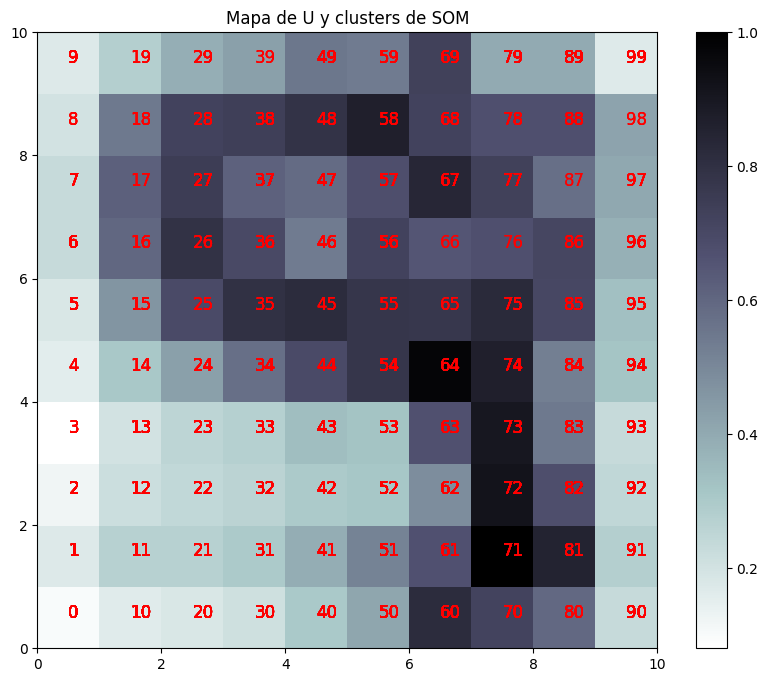

In [36]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Definir las dimensiones del mapa de salida de SOM
som_width = 10  # Número de neuronas en la dimensión X
som_height = 10  # Número de neuronas en la dimensión Y

# Inicializar el SOM
som = MiniSom(x=som_width, y=som_height, input_len=len(columnas_a_escalar), sigma=1.0, learning_rate=0.5)

# Inicializar los pesos aleatoriamente y entrenar el SOM
som.random_weights_init(df_tiendas[columnas_a_escalar].values)  # Usar valores escalados
som.train_random(df_tiendas[columnas_a_escalar].values, 1000)  # Entrenamiento

# Asignar cada punto de datos a la neurona más cercana
clusters = np.array([som.winner(x) for x in df_tiendas[columnas_a_escalar].values])

# Convertir las coordenadas de la cuadrícula en etiquetas de clusters
unique_clusters = np.unique(clusters, axis=0)
cluster_labels = np.zeros(len(clusters))

for i, cluster in enumerate(clusters):
    cluster_labels[i] = np.where((unique_clusters == cluster).all(axis=1))[0][0]

# Agregar estos clusters al DataFrame original
df_tiendas['cluster'] = cluster_labels

# Visualizar la cantidad de puntos en cada cluster
print(df_tiendas['cluster'].value_counts())

# Visualizar el mapa de U (distancia entre los nodos) para mostrar los bordes entre clusters
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Mapa de distancias entre nodos del SOM
plt.colorbar()

# Marcar los puntos de datos en el SOM
for idx, x in enumerate(df_tiendas[columnas_a_escalar].values):
    w = som.winner(x)  # Encontrar la neurona ganadora para cada punto
    plt.text(w[0] + 0.5, w[1] + 0.5, str(int(cluster_labels[idx])), color='red', fontsize=12)

plt.title('Mapa de U y clusters de SOM')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_tiendas, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.01713383506657212


In [39]:
# Visualizar la cantidad de puntos en cada cluster
print(df_tiendas['cluster'].describe())

count    1982.000000
mean       53.119072
std        29.241530
min         0.000000
25%        30.000000
50%        54.000000
75%        82.000000
max        99.000000
Name: cluster, dtype: float64


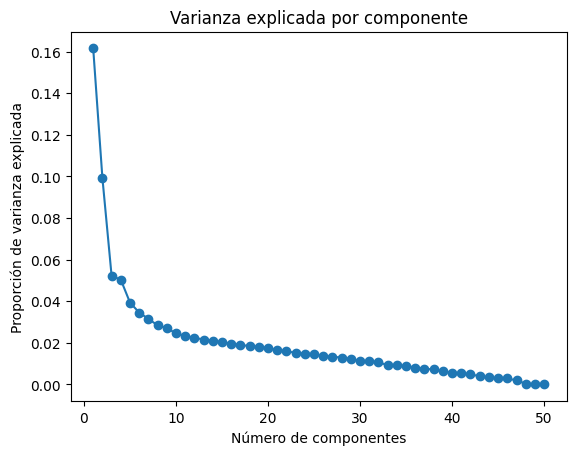

In [40]:
pca = PCA()
pca.fit(df_tiendas[columnas_a_escalar])

# Gráfico de varianza explicada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Varianza explicada por componente')
plt.xlabel('Número de componentes')
plt.ylabel('Proporción de varianza explicada')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score
import numpy as np
from minisom import MiniSom

def evaluate_som(som, data):
    # Obtener las coordenadas de los clusters
    clusters = np.array([som.winner(x) for x in data])

    # Obtener las dimensiones del mapa de SOM
    som_weights = som.get_weights()
    som_height, som_width = som_weights.shape[0:2]  # (height, width)

    # Convertir las coordenadas a etiquetas únicas
    cluster_labels = np.array([clusters[i, 0] * som_width + clusters[i, 1] for i in range(len(clusters))])

    # Calcular el índice de silueta
    if len(set(cluster_labels)) > 1:  # Asegúrate de que haya más de un cluster
        score = silhouette_score(data, cluster_labels)
    else:
        score = -1  # Asigna un valor negativo si hay solo un cluster

    return score

# Continuar con tu búsqueda de cuadrícula
best_score = float('-inf')  # Inicializa con un valor muy bajo para maximizar el score
best_params = None

for params in param_combinations:
    som_width, som_height, learning_rate, sigma = params

    # Inicializar el SOM con los parámetros actuales
    som = MiniSom(x=som_width, y=som_height, input_len=len(columnas_a_escalar), sigma=sigma, learning_rate=learning_rate)

    # Entrenar el SOM
    som.random_weights_init(df_tiendas[columnas_a_escalar].values)
    som.train_random(df_tiendas[columnas_a_escalar].values, 1000)

    # Evaluar el rendimiento del SOM
    score = evaluate_som(som, df_tiendas[columnas_a_escalar].values)

    # Guardar la mejor combinación de parámetros
    if score > best_score:
        best_score = score
        best_params = params

print("Mejores parámetros:", best_params)

Mejores parámetros: (8, 8, 0.9, 0.5)


cluster
3.0     72
6.0     66
14.0    60
10.0    59
26.0    58
        ..
55.0    14
53.0    13
40.0    12
42.0     9
22.0     8
Name: count, Length: 64, dtype: int64


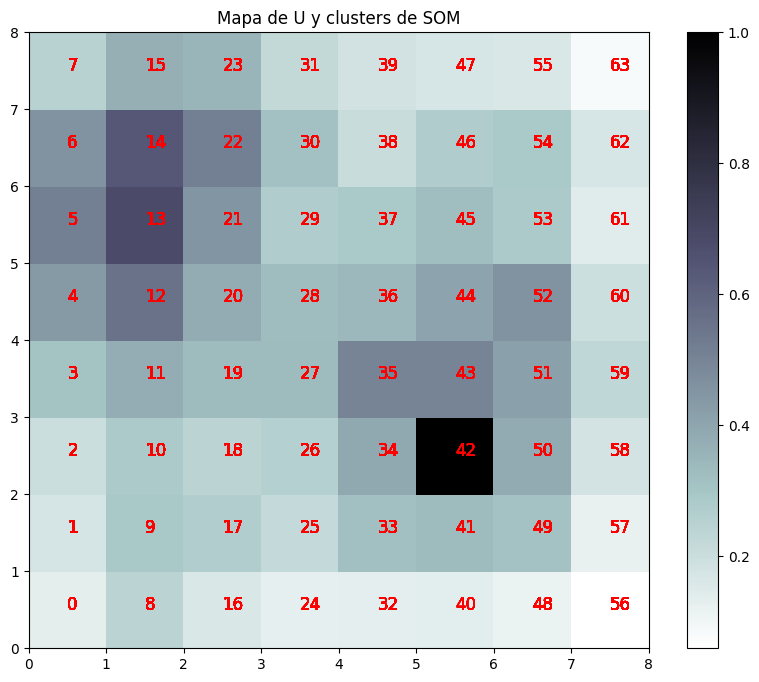

Silhouette Score: 0.1807243953165558


In [71]:
# Definir las dimensiones del mapa de salida de SOM
som_width = 8  # Número de neuronas en la dimensión X
som_height = 8  # Número de neuronas en la dimensión Y
sigma = 0.9  # Ancho de la vecindad
learning_rate = 0.5  # Tasa de aprendizaje

# Inicializar el SOM
som = MiniSom(x=som_width, y=som_height, input_len=len(columnas_a_escalar), sigma=sigma, learning_rate=learning_rate)

# Inicializar los pesos aleatoriamente y entrenar el SOM
som.random_weights_init(df_tiendas[columnas_a_escalar].values)  # Usar valores escalados
som.train_random(df_tiendas[columnas_a_escalar].values, 1000)  # Entrenamiento

# Asignar cada punto de datos a la neurona más cercana
clusters = np.array([som.winner(x) for x in df_tiendas[columnas_a_escalar].values])

# Convertir las coordenadas de la cuadrícula en etiquetas de clusters
unique_clusters = np.unique(clusters, axis=0)
cluster_labels = np.zeros(len(clusters))

for i, cluster in enumerate(clusters):
    cluster_labels[i] = np.where((unique_clusters == cluster).all(axis=1))[0][0]

# Agregar estos clusters al DataFrame original
df_tiendas['cluster'] = cluster_labels

# Visualizar la cantidad de puntos en cada cluster
print(df_tiendas['cluster'].value_counts())

# Visualizar el mapa de U (distancia entre los nodos) para mostrar los bordes entre clusters
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Mapa de distancias entre nodos del SOM
plt.colorbar()

# Marcar los puntos de datos en el SOM
for idx, x in enumerate(df_tiendas[columnas_a_escalar].values):
    w = som.winner(x)  # Encontrar la neurona ganadora para cada punto
    plt.text(w[0] + 0.5, w[1] + 0.5, str(int(cluster_labels[idx])), color='red', fontsize=12)

plt.title('Mapa de U y clusters de SOM')
plt.show()

# Calcular el puntaje de silueta
silhouette_avg = silhouette_score(df_tiendas[columnas_a_escalar].values, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

In [73]:
import pandas as pd

# Supongamos que `data` es tu DataFrame original y `labels` son las etiquetas de cluster generadas por el SOM.
# Añade las etiquetas al DataFrame
df_tiendas['cluster'] = cluster_labels  # Reemplaza `labels` con el array o lista de etiquetas de cluster

# Contar el número de observaciones en cada cluster
cluster_counts = df_tiendas['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'Count']

# Mostrar la cantidad de clusters y sus respectivos conteos
print(cluster_counts)

# Para ver la cantidad total de clusters
total_clusters = cluster_counts['cluster'].nunique()
print(f'Total de clusters generados: {total_clusters}')

    cluster  Count
0       3.0     72
1       6.0     66
2      14.0     60
3      10.0     59
4      26.0     58
..      ...    ...
59     55.0     14
60     53.0     13
61     40.0     12
62     42.0      9
63     22.0      8

[64 rows x 2 columns]
Total de clusters generados: 64


In [83]:
columnas_a_escalar = ['estaciones_servicio_200mts', 'estaciones_servicio_1000mts',
                       'subtes_200mts', 'subtes_1000mts', 'porc_nbi',
                       'hacinamiento', 'porc_mujeres', 'porc_varones',
                       'uni_privada_200mts', 'uni_publica_200mts',
                       'uni_privada_1000mts', 'uni_publica_1000mts',
                       'estadios_200mts', 'estadios_1000mts',
                       'river_1500mts', 'boca_1500mts',
                       'clubes_200mts', 'clubes_1000mts',
                       'tienda_mas_cercana', 'escuelas_cercanas_200m',
                       'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
                       'paradas_cercanas_1000m', 'everdes_cercanos_200m',
                       'everdes_cercanos_1000m', 'hay_bicicleteros_200m',
                       'hospitales_cercanos_200m', 'hospitales_cercanos_1000m',
                       'distancia_al_hospital_mas_cercano',
                       'parroquias_cercanas_200m', 'parroquias_cercanas_1000m',
                       'negocios_cercanos_200m', 'negocios_cercanos_1000m',
                       'tiendas_cercanas_200m', 'supermercados_200m',
                       'supermercados_1000m', 'hipermercado_200m',
                       'hipermercado_1000m', 'autoservicio_200m',
                       'autoservicio_1000m', 'negocios_24hs_cercanos_1000m',
                       'negocios_findesemana_200m', 'mon_open',
                       'tue_open', 'wed_open', 'thu_open', 'fri_open',
                       'sat_open', 'sun_open', 'supermercado_chino',
                       'supermercado', 'en_avenida', 'pob',
                       'producto_1_freq', 'producto_2_freq',
                       'producto_3_freq', 'producto_4_freq',
                       'producto_5_freq', 'categoria_1_freq',
                       'categoria_2_freq', 'categoria_3_freq',
                       'categoria_4_freq', 'categoria_5_freq',
                       'comuna_freq']

# Paso 1: Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_tiendas[columnas_a_escalar])

# Paso 2: Definir dimensiones del SOM
som_shape = (8, 8)  # Puedes ajustar esto según tus necesidades

# Crear y entrenar el SOM
som = MiniSom(som_shape[0], som_shape[1], data_scaled.shape[1], sigma=0.9, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, num_iteration=1000)

# Paso 3: Obtener las coordenadas de los nodos ganadores
win_map = som.win_map(data_scaled)
clusters = []

# Asignar cada observación a un cluster basado en el nodo ganador
for x in data_scaled:
    w = som.winner(x)
    clusters.append(w)

# Convertir las coordenadas de los nodos a un formato más útil
clusters = np.array(clusters)

# Paso 4: Aplicar K-means a los nodos ganadores para crear 3 clusters
unique_winners = np.unique(clusters, axis=0)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(unique_winners)

# Asignar el cluster correspondiente a cada observación en df_tiendas
df_tiendas['cluster'] = np.array([kmeans.labels_[np.argmin(np.linalg.norm(unique_winners - w, axis=1))] for w in clusters])

# Paso 5: Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(data_scaled, df_tiendas['cluster'])
print(f'El coeficiente de silueta es: {silhouette_avg}')

# Paso 6: Contar la cantidad de observaciones en cada cluster
cluster_counts = df_tiendas['cluster'].value_counts()
print(cluster_counts)

El coeficiente de silueta es: 0.04740647869441533
cluster
2    927
1    595
0    460
Name: count, dtype: int64
